<a href="https://colab.research.google.com/github/exalteded/DSPS_ejones/blob/master/HW8/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats
import pylab as pl
import math
%pylab inline
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['legend']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
m19 = pd.read_csv ("https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/9QKJU2/WOMIZQ", sep = "\t" , header = None)

In [0]:
newdroppeddataframe = m19[[0,1]].dropna().rename(columns={0:"T",1:"n"})
np.random.seed(202454)
newdroppeddataframe['uncertainties'] = np.random.normal(0,10,len(newdroppeddataframe))

In [0]:
def anypol(x, *coeffs):
    """
    given some { x = [x1,x2,x3,x4,x5,...], a, b, c, d ... } anypol returns
    a + b x + c x^2 + d x^3 + ... as an array
    i.e. it returns the y-values associated with each given x-velue


    x is some array or list of values.

    a, b, c, d, ... are coefficients of the polynomial in increasing degree
    """
    func = 0
    for i in range(len(coeffs)):
        func += coeffs[i] * np.power(x, i)
    return func

In [0]:
lopt, lcov = sp.optimize.curve_fit(anypol, newdroppeddataframe['T'], newdroppeddataframe['n'], p0=[1,1])

Text(0.5, 1.0, 'MCMC and R^2 Fits of temperature vs molecules data')

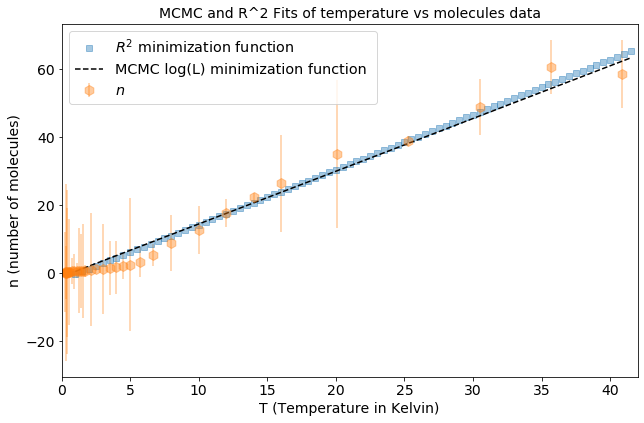

In [94]:
xarr = np.arange(1, 42, 0.5)

fig = pl.figure(figsize=(10, 7))
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))

pl.plot(xarr, anypol(xarr, *lopt), 's', label = r'$R^2$ minimization function', alpha = .4)
pl.errorbar(newdroppeddataframe['T'] , newdroppeddataframe['n'], yerr=newdroppeddataframe['uncertainties'], fmt='h', ms=10, label = '$n$', alpha = .4)
pl.plot(xarr, 1.55*xarr - 1, 'k--', label = 'MCMC log(L) minimization function ')
legend = pl.legend(fontsize = 'x-large')
pl.ylabel('n (number of molecules)', fontsize = 14)
pl.xlabel('T (Temperature in Kelvin)', fontsize = 14)
pl.xticks(fontsize = 14)
pl.yticks(fontsize = 14)
ax1.set_xlim([0,42])
ax1.set_title('MCMC and R^2 Fits of temperature vs molecules data', fontsize = 14)